# **Rapport de Projet : Évaluation Expérimentale de la Classification et de la Reconnaissance des Maladies des Feuilles de Café à Base d'Algorithmes d'Apprentissage Machine et d'Apprentissage Profond**

## 1. Introduction Générale :
Le secteur agricole, regroupant la culture des terres et l'élevage, est continuellement confronté à des maladies potentiellement préjudiciables à la production. Ces maladies impactent négativement les plantes et les animaux, entravant l'accès au marché pour la production agricole. Les maladies affectant les plantes, notamment les cultures comme le café, représentent un défi majeur en termes de rendement et de qualité pour les producteurs. L'identification précoce et la reconnaissance des maladies sont cruciales pour minimiser les pertes de récolte. Cependant, la détection manuelle des maladies des plantes, surtout sur de vastes exploitations, présente des limites de fiabilité.

## 2. Objectifs du Projet :
Les objectifs principaux de ce projet sont les suivants :
- Développer un système de détection automatique et de classification des maladies des feuilles de café.
- Évaluer et comparer les performances d'algorithmes d'apprentissage machine classiques et d'apprentissage profond dans la classification des maladies.
- Identifier la méthode la plus fiable en termes de précision pour la reconnaissance précoce des maladies des feuilles de café.
- Offrir une solution technologique permettant aux experts agricoles d'adopter des mesures préventives dès les premiers signes de maladies.

## 3. Contexte du Problème :
Avec une production mondiale de café dépassant les 7 millions de tonnes par an, le café est l'une des cultures les plus consommées. Au Kenya, le deuxième plus grand producteur africain de café arabica, des maladies comme cerscospora, la rouille du café et la phoma compromettent la production en attaquant les feuilles de café. L'identification précoce de ces maladies et la mise en œuvre de mesures préventives sont des défis persistants, en particulier en raison de la difficulté de la détection manuelle à grande échelle.

## 4. Utilité de la Vision par Ordinateur :
L'utilisation de la vision par ordinateur pour la détection des maladies des plantes offre une solution prometteuse. Cette approche permet une identification rapide des maladies, facilitant ainsi la mise en place de mesures préventives. La détection et la classification des maladies des feuilles de café revêtent une importance économique et technique significative dans le secteur agricole. Les avancées récentes en vision par ordinateur, en particulier l'utilisation de techniques d'apprentissage profond, ont montré des résultats prometteurs dans la détection des maladies des plantes.

## 5. Détermination de la Meilleure Approche :
Malgré les progrès réalisés, il est essentiel de déterminer quelle approche, entre les méthodes d'apprentissage machine classiques et les méthodes d'apprentissage profond, offre la meilleure fiabilité pour la classification des maladies des feuilles de café. Cette étude vise à évaluer les performances de divers algorithmes, allant des méthodes traditionnelles d'apprentissage machine aux réseaux neuronaux convolutifs personnalisés. L'objectif est d'identifier la méthode la plus précise et fiable pour la reconnaissance des maladies, contribuant ainsi à une gestion agricole plus efficace.

## 6. Description détaillée du jeu de données
Le jeu de données utilisé pour notre étude est la base de données d'images de feuilles de café Arabica appelée JMuBEN. Cette base de données provient d'une plantation située dans le comté de Kirinyaga, au Kenya. Elle est spécifiquement axée sur les feuilles de café Arabica. Le jeu de données est constitué de 5 classes différentes, représentant différentes conditions des feuilles de café.

Classes du jeu de données :
1. **Cerscospora :** Ce dossier contient 7682 images représentant des feuilles de café affectées par la maladie de Cerscospora.
2. **Rust :** Le deuxième dossier comprend 8337 images illustrant des feuilles de café atteintes par la rouille.
3. **Phoma :** Le troisième dossier contient 6572 images représentant des feuilles de café touchées par la maladie de Phoma.
4. **Healthy :** Nous avons également ajouté un dossier de 8927 images de feuilles de café en bonne santé, provenant du dossier JMuBEN2.
5. **Miner :** Ce dossier contient [nombre d'images] images représentant des feuilles de café affectées par la maladie de Miner.

## Nombre total d'images :
En somme, le jeu de données de notre étude comprend un total de 31 518 images de feuilles de café, réparties dans les cinq classes mentionnées ci-dessus.


La diversité des images permettra une évaluation exhaustive des performances des algorithmes de classification et de reconnaissance des maladies des feuilles de café dans le cadre de notre projet.








**Cerscospora** **Rust** **Phoma** **Healthy** **Miner**

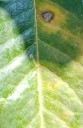  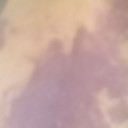  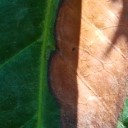  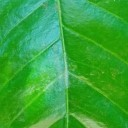  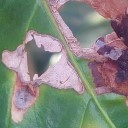


# Importing

In [210]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.utils import shuffle
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow import keras
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

In [211]:
import os
import pandas as pd
import shutil

In [212]:
# Set the path to the Data folder and CSV file
data_folder_path = "/content/Data"

# Read CSV file into a DataFrame
csv_file_path = "/content/dataset.csv"
df_csv = pd.read_csv(csv_file_path)
df_csv

,id,predominant_stress,miner,rust,phoma,cercospora,severity
0,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0
2,3,0,0,0,0,0,0
3,4,0,0,0,0,0,0
4,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1680,1743,2,0,1,0,0,2
1681,1744,2,0,1,0,1,2
1682,1745,4,0,1,0,1,1
1683,1746,4,0,0,0,1,1


In [213]:
# Create folders for each disease and the 'healthy' folder
disease_folders = ['miner', 'rust', 'phoma', 'cercospora']
output_folders = [os.path.join("/content/train/", folder) for folder in disease_folders + ['healthy']]
for folder in output_folders:
    os.makedirs(folder, exist_ok=True)


In [214]:
#!rm -r /content/Data

In [215]:
# Loop through the DataFrame and move images to the respective folders
for index, row in df_csv.iterrows():
    image_id = row['id']
    image_extension = '.jpg'

    if row[disease_folders].sum() == 0:
        # Move images with no disease to the 'healthy' folder
        image_path = os.path.join(data_folder_path, f"{image_id}{image_extension}")
        if os.path.exists(image_path):
            destination_path = os.path.join('/content/train/', 'healthy')
            destination_file = os.path.join(destination_path, f"{image_id}{image_extension}")
            if not os.path.exists(destination_file):
                print(f"Moving {image_path} to {destination_file}")
                shutil.move(image_path, destination_path)
            else:
                print(f"Skipping {image_path} because {destination_file} already exists.")
    else:
        # Move images to the folder corresponding to the detected disease
        disease_folder = disease_folders[row[disease_folders].to_numpy().nonzero()[0][0]]
        image_path = os.path.join(data_folder_path, f"{image_id}{image_extension}")
        destination_path = os.path.join("/content/train/", disease_folder)
        destination_file = os.path.join(destination_path, f"{image_id}{image_extension}")
        if os.path.exists(image_path):
            if not os.path.exists(destination_file):
                print(f"Moving {image_path} to {destination_file}")
                shutil.move(image_path, destination_path)
            else:
                continue
        else:
            continue


In [216]:
print(row[disease_folders])

miner         0
rust          1
phoma         0
cercospora    1
Name: 1684, dtype: int64


# Exploratary analysis

In [217]:
dataset_path = '/content/train/'

# Create an empty dataframe
df = pd.DataFrame(columns=['Image', 'Label'])

# Loop through each class folder
class_folders = ['healthy','cercospora','miner','phoma' ,'rust' ]
for label, folder in enumerate(class_folders):
    class_path = os.path.join(dataset_path, folder)
    print(folder)
    # Loop through each image in the class folder
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        # Read the image using OpenCV
        img = image_path
        df = pd.concat([df, pd.DataFrame({'Image': [img], 'Label': [label]})], ignore_index=True)

# Shuffle the dataframe
df = shuffle(df).reset_index(drop=True)

healthy
cercospora
miner
phoma
rust


In [218]:
# Dictionary mapping labels to class names
class_names = {
    0: 'healthy',
    1: 'cercospora',
    2: 'miner',
    3: 'phoma',
    4: 'rust'
}

# Check if each image has its designated label and display the class name
for index, row in df.iterrows():
    image_path = row['Image']
    label = row['Label']
    class_name = label
    print(f"Image: {image_path}, Label: {label}, Class Name: {class_name}")

Image: /content/train/phoma/1 (213).jpg, Label: 3, Class Name: 3
Image: /content/train/rust/1 (97).jpg, Label: 4, Class Name: 4
Image: /content/train/miner/1 (1150).jpg, Label: 2, Class Name: 2
Image: /content/train/healthy/1 (244).jpg, Label: 0, Class Name: 0
Image: /content/train/phoma/1 (216).jpg, Label: 3, Class Name: 3
Image: /content/train/miner/22.jpg, Label: 2, Class Name: 2
Image: /content/train/rust/1 (171).jpg, Label: 4, Class Name: 4
Image: /content/train/phoma/1 (61).jpg, Label: 3, Class Name: 3
Image: /content/train/cercospora/4 (107).jpg, Label: 1, Class Name: 1
Image: /content/train/rust/125.jpg, Label: 4, Class Name: 4
Image: /content/train/phoma/1 (158).jpg, Label: 3, Class Name: 3
Image: /content/train/healthy/178.jpg, Label: 0, Class Name: 0
Image: /content/train/phoma/1 (175).jpg, Label: 3, Class Name: 3
Image: /content/train/miner/1 (1091).jpg, Label: 2, Class Name: 2
Image: /content/train/rust/1 (93).jpg, Label: 4, Class Name: 4
Image: /content/train/healthy/1 (6

In [219]:
df

,Image,Label
0,/content/train/phoma/1 (213).jpg,3
1,/content/train/rust/1 (97).jpg,4
2,/content/train/miner/1 (1150).jpg,2
3,/content/train/healthy/1 (244).jpg,0
4,/content/train/phoma/1 (216).jpg,3
...,...,...
1964,/content/train/rust/1 (253).jpg,4
1965,/content/train/phoma/246.jpg,3
1966,/content/train/healthy/1 (123).jpg,0
1967,/content/train/rust/1 (55).jpg,4


* Label 0: Cerscospora
* Label 1: Rust
* Label 2: Miner
* Label 3: Phoma
* Label 4: Healthy


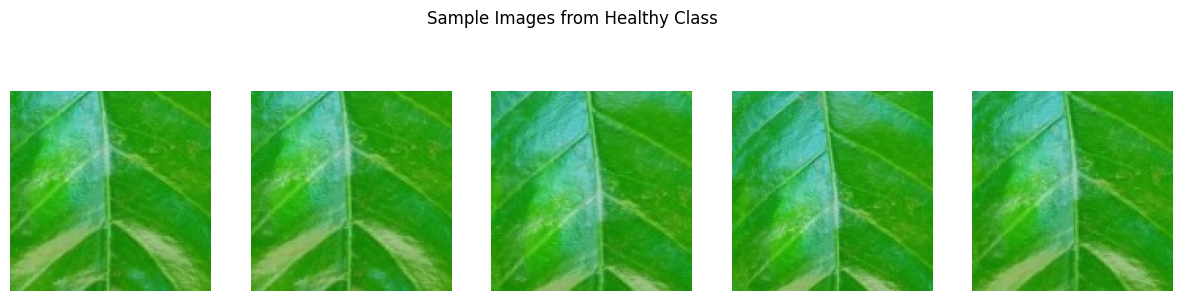

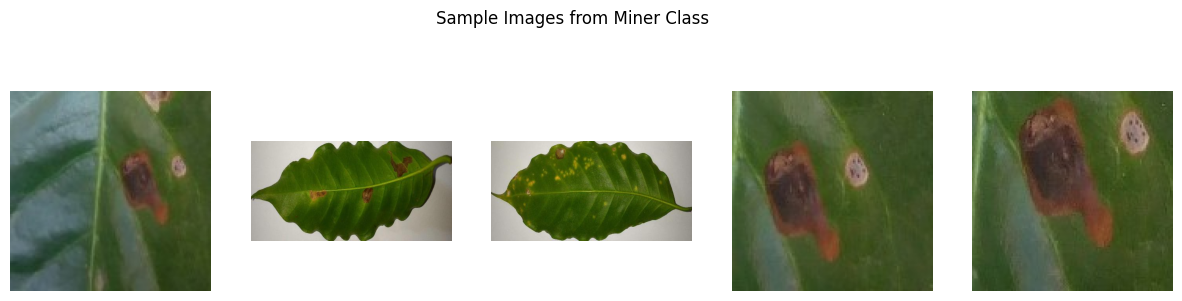

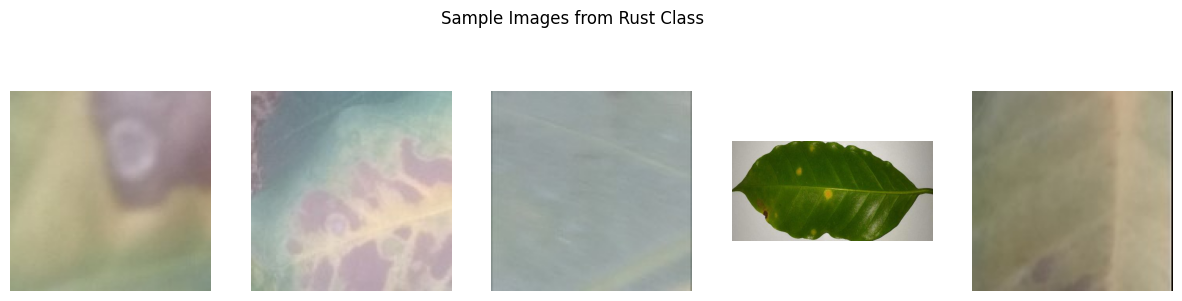

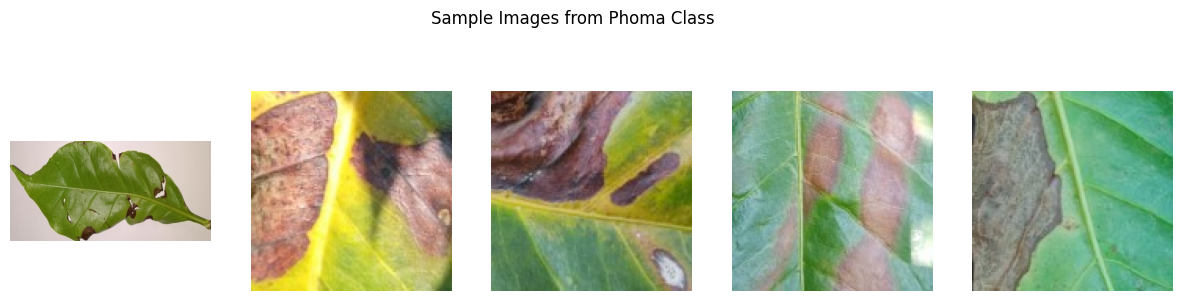

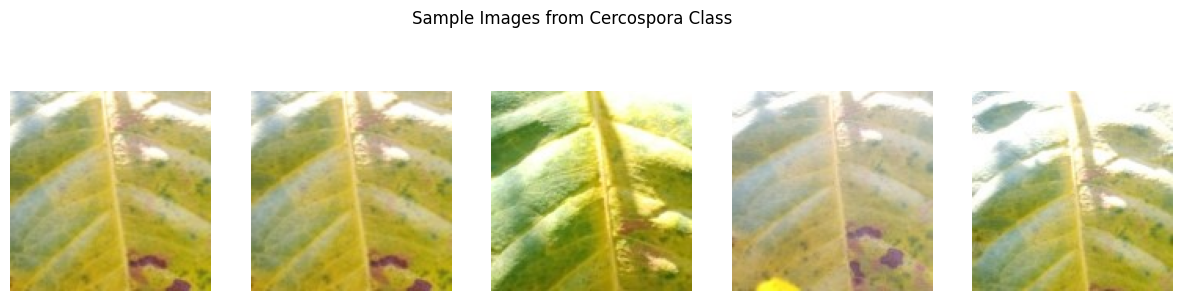

In [220]:
# Set the path to the Data folder
data_folder_path = "/content/train/"

# Create a list of disease folders
disease_folders = ['healthy', 'miner', 'rust', 'phoma', 'cercospora']

# Set the number of sample images to display for each class
num_samples_per_class = 5

# Plot images from each class
for disease_folder in disease_folders:
    folder_path = os.path.join(data_folder_path, disease_folder)
    image_files = os.listdir(folder_path)
    random_samples = random.sample(image_files, min(num_samples_per_class, len(image_files)))

    plt.figure(figsize=(15, 3))
    plt.suptitle(f"Sample Images from {disease_folder.capitalize()} Class", y=1.1)

    for i, image_file in enumerate(random_samples):
        image_path = os.path.join(folder_path, image_file)
        plt.subplot(1, num_samples_per_class, i + 1)
        plt.imshow(mpimg.imread(image_path))
        plt.axis('off')

    plt.show()


In [221]:
# Function to display basic image information
def display_image_info(image_path):
    img = cv2.imread(image_path)

    # Get image dimensions
    height, width, channels = img.shape

    # Display basic information
    print(f"Image Path: {image_path}")
    print(f"Dimensions: {width} x {height} pixels")
    print(f"Number of Channels: {channels}")
    print(f"Pixel Value Range: {img.min()} to {img.max()}")


# Display basic information for a sample image from each class
for index, row in df.iterrows():
    sample_image_path = row['Image']
    label = row['Label']
    display_image_info(sample_image_path)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Image Path: /content/train/rust/1 (258).jpg
Dimensions: 128 x 128 pixels
Number of Channels: 3
Pixel Value Range: 100 to 213
Image Path: /content/train/healthy/186.jpg
Dimensions: 512 x 256 pixels
Number of Channels: 3
Pixel Value Range: 0 to 252
Image Path: /content/train/cercospora/4 (59).jpg
Dimensions: 128 x 128 pixels
Number of Channels: 3
Pixel Value Range: 11 to 255
Image Path: /content/train/rust/1 (12).jpg
Dimensions: 128 x 128 pixels
Number of Channels: 3
Pixel Value Range: 0 to 238
Image Path: /content/train/phoma/1 (241).jpg
Dimensions: 128 x 128 pixels
Number of Channels: 3
Pixel Value Range: 0 to 255
Image Path: /content/train/miner/1 (1147).jpg
Dimensions: 128 x 128 pixels
Number of Channels: 3
Pixel Value Range: 48 to 255
Image Path: /content/train/rust/1 (359).jpg
Dimensions: 128 x 128 pixels
Number of Channels: 3
Pixel Value Range: 99 to 223
Image Path: /content/train/miner/83.jpg
Dimensions

# Distribution of our dataset

In [222]:
data= image_dataset_from_directory("/content/train",seed=123,shuffle=True,subset='both',validation_split=0.3,image_size=(224,224))

Found 1969 files belonging to 5 classes.
Using 1379 files for training.
Using 590 files for validation.


In [223]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/train",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(128, 128),
  batch_size=32)
val_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/train",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(128,128),
  batch_size=32)

Found 1969 files belonging to 5 classes.
Using 1576 files for training.
Found 1969 files belonging to 5 classes.
Using 393 files for validation.


In [224]:
class_names = train_ds.class_names
print(class_names)

['cercospora', 'healthy', 'miner', 'phoma', 'rust']


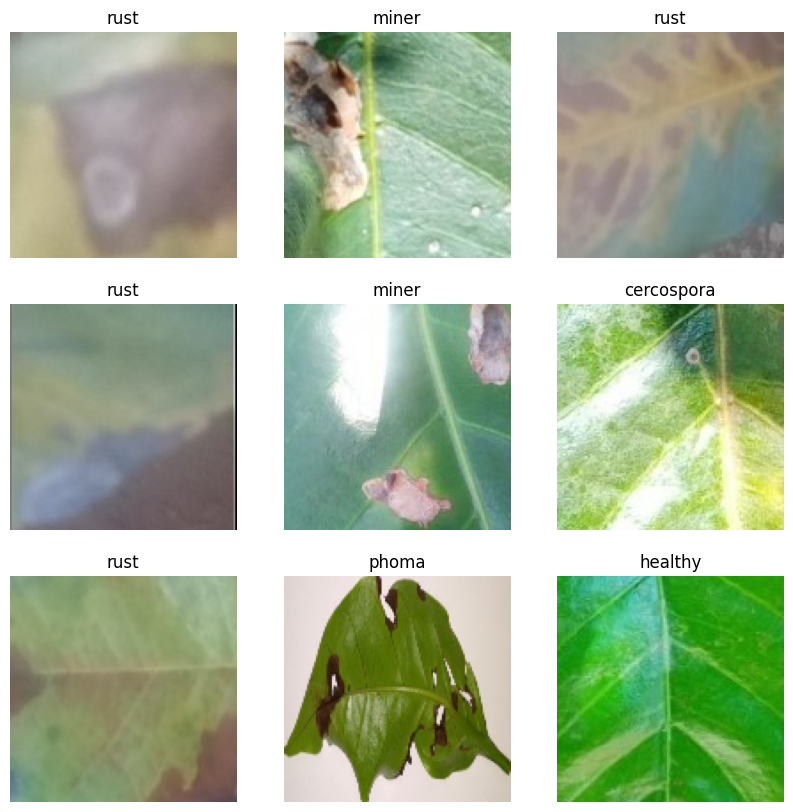

In [225]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [226]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


# Data Pipeline Optimization

In [227]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Data normalization

In [228]:
normalization_layer = layers.Rescaling(1./255)

In [229]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


# Disease classification

# Deep Learning Models

## Custom CNN

### Creating the model

In [230]:
# Define the model
model = models.Sequential()

# Block 1
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Block 2
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Block 3
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Flatten and Fully Connected layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(5, activation='softmax'))

# Display model summary
model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_209 (Conv2D)         (None, 128, 128, 16)      448       
                                                                 
 batch_normalization_209 (B  (None, 128, 128, 16)      64        
 atchNormalization)                                              
                                                                 
 conv2d_210 (Conv2D)         (None, 128, 128, 16)      2320      
                                                                 
 batch_normalization_210 (B  (None, 128, 128, 16)      64        
 atchNormalization)                                              
                                                                 
 conv2d_211 (Conv2D)         (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 64, 64, 32)      

### Compiling the model

In [231]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### forming the model

In [232]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
50/50 [==============================] - 6s 52ms/step - loss: 0.7590 - accuracy: 0.7214 - val_loss: 1.5034 - val_accuracy: 0.2875
Epoch 2/30
50/50 [==============================] - 2s 45ms/step - loss: 0.2212 - accuracy: 0.9391 - val_loss: 1.4557 - val_accuracy: 0.3944
Epoch 3/30
50/50 [==============================] - 2s 45ms/step - loss: 0.1285 - accuracy: 0.9734 - val_loss: 1.4094 - val_accuracy: 0.4377
Epoch 4/30
50/50 [==============================] - 2s 43ms/step - loss: 0.0729 - accuracy: 0.9949 - val_loss: 1.1055 - val_accuracy: 0.5293
Epoch 5/30
50/50 [==============================] - 2s 43ms/step - loss: 0.0530 - accuracy: 0.9975 - val_loss: 0.7649 - val_accuracy: 0.6718
Epoch 6/30
50/50 [==============================] - 2s 44ms/step - loss: 0.0392 - accuracy: 0.9994 - val_loss: 0.4546 - val_accuracy: 0.8219
Epoch 7/30
50/50 [==============================] - 2s 43ms/step - loss: 0.0316 - accuracy: 1.0000 - val_loss: 0.2755 - val_accuracy: 0.9084
Epoch 8/30
50

### Visualizing Results

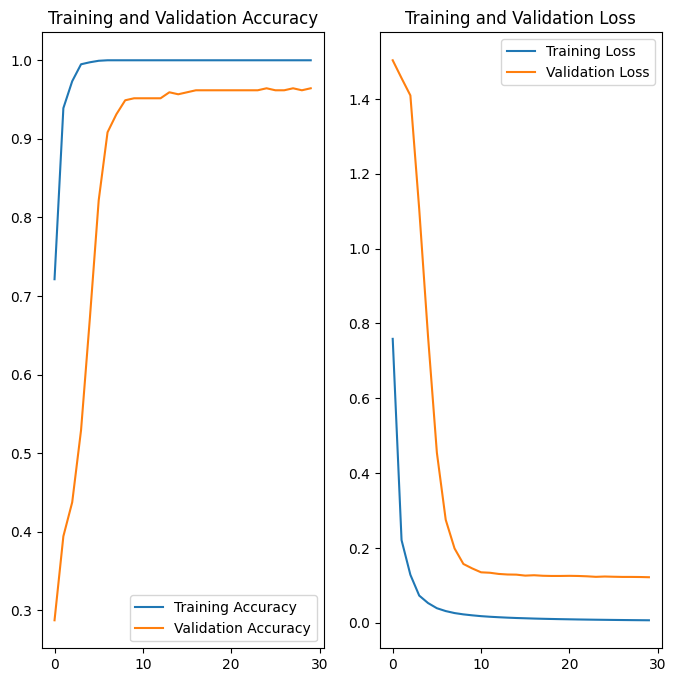

In [233]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 167ms/step


<Figure size 800x800 with 0 Axes>

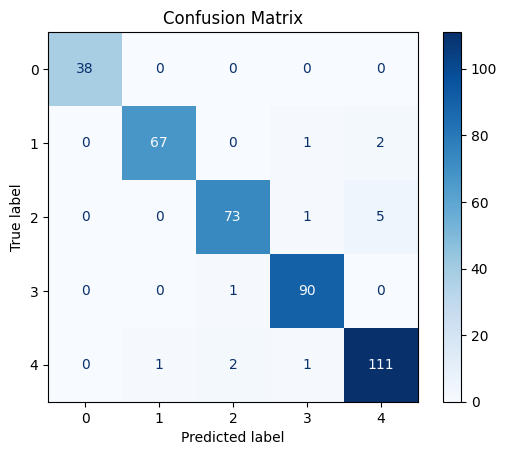

In [234]:
y_true = []
y_pred = []

for x_batch, y_batch in val_ds:
    y_true.extend(y_batch.numpy())
    y_pred.extend(np.argmax(model.predict(x_batch), axis=1))
y_true = np.array(y_true)
y_pred = np.array(y_pred)

cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
classes = [str(i) for i in range(5)]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
plt.figure(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [235]:
# Print classification report
report = classification_report(y_true, y_pred, target_names=classes)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.99      0.96      0.97        70
           2       0.96      0.92      0.94        79
           3       0.97      0.99      0.98        91
           4       0.94      0.97      0.95       115

    accuracy                           0.96       393
   macro avg       0.97      0.97      0.97       393
weighted avg       0.96      0.96      0.96       393



### Prediction on new Data

In [236]:
img = tf.keras.utils.load_img(
   "/content/test.jpg", target_size=(128, 128)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 19ms/step
This image most likely belongs to miner with a 24.99 percent confidence.


## MobileNet

### Creating the model

In [237]:
# Load the MobileNetV2 model pre-trained on ImageNet
base_model = tf.keras.applications.mobilenet.MobileNet(input_shape=(128, 128, 3),
                                               include_top=False,
                                               weights='imagenet')

In [238]:
# Freeze the base model layers
base_model.trainable = False

# Create the model by adding custom layers on top of MobileNetV2
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

### Compiling the model

In [239]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functi  (None, 4, 4, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d_8  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_30 (Dense)            (None, 128)               131200    
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_31 (Dense)            (None, 5)                 645       
                                                                 
Total params: 3360709 (12.82 MB)
Trainable params: 13

### Forming the model

In [240]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
50/50 [==============================] - 3s 28ms/step - loss: 1.7382 - accuracy: 0.3027 - val_loss: 1.3353 - val_accuracy: 0.4453
Epoch 2/30
50/50 [==============================] - 1s 17ms/step - loss: 1.4136 - accuracy: 0.4112 - val_loss: 1.1535 - val_accuracy: 0.5547
Epoch 3/30
50/50 [==============================] - 1s 17ms/step - loss: 1.2309 - accuracy: 0.5000 - val_loss: 1.0509 - val_accuracy: 0.6260
Epoch 4/30
50/50 [==============================] - 1s 17ms/step - loss: 1.0898 - accuracy: 0.5647 - val_loss: 0.9646 - val_accuracy: 0.6947
Epoch 5/30
50/50 [==============================] - 1s 21ms/step - loss: 1.0365 - accuracy: 0.5926 - val_loss: 0.8970 - val_accuracy: 0.7176
Epoch 6/30
50/50 [==============================] - 1s 21ms/step - loss: 0.9609 - accuracy: 0.6364 - val_loss: 0.8434 - val_accuracy: 0.7506
Epoch 7/30
50/50 [==============================] - 1s 18ms/step - loss: 0.9111 - accuracy: 0.6707 - val_loss: 0.7886 - val_accuracy: 0.7557
Epoch 8/30
50

### Visualizing Results

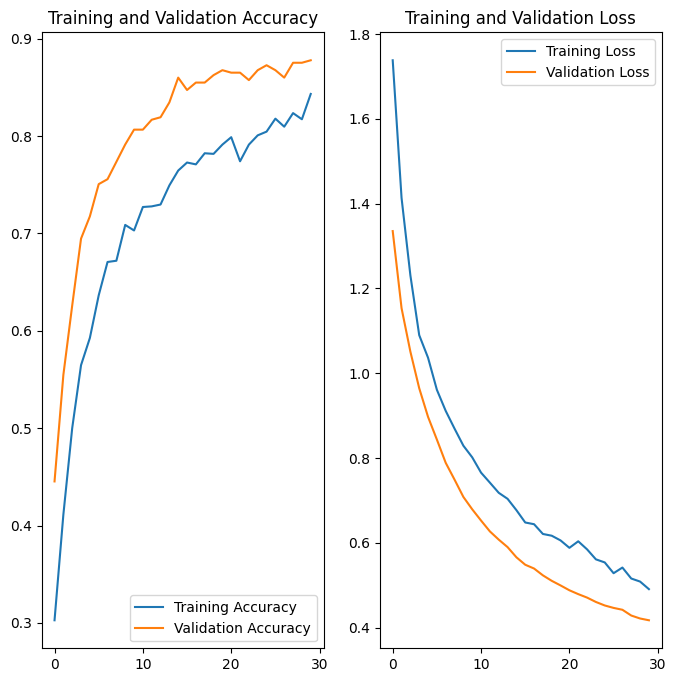

In [241]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 1s 622ms/step


<Figure size 800x800 with 0 Axes>

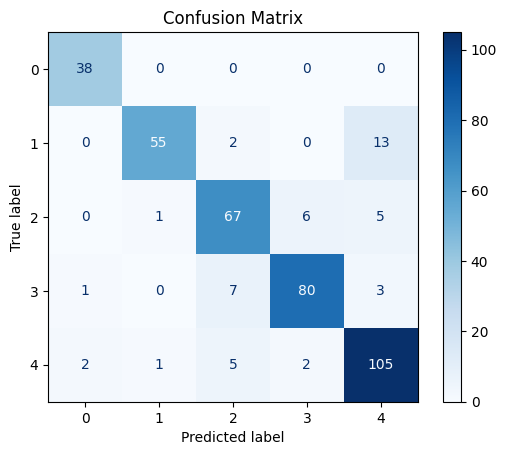

In [242]:
y_true = []
y_pred = []

for x_batch, y_batch in val_ds:
    y_true.extend(y_batch.numpy())
    y_pred.extend(np.argmax(model.predict(x_batch), axis=1))
y_true = np.array(y_true)
y_pred = np.array(y_pred)

cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
classes = [str(i) for i in range(5)]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
plt.figure(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [243]:
# Print classification report
report = classification_report(y_true, y_pred, target_names=classes)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        38
           1       0.96      0.79      0.87        70
           2       0.83      0.85      0.84        79
           3       0.91      0.88      0.89        91
           4       0.83      0.91      0.87       115

    accuracy                           0.88       393
   macro avg       0.89      0.89      0.89       393
weighted avg       0.88      0.88      0.88       393



### Prediction on new Data

In [244]:
img = tf.keras.utils.load_img(
   "/content/test.jpg", target_size=(128, 128)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 20ms/step
This image most likely belongs to rust with a 24.99 percent confidence.


## ResNet-50

### Creating the model

In [245]:
# Load the ResNet50 model pre-trained on ImageNet
base_model = tf.keras.applications.ResNet50(input_shape=(128, 128, 3),
                                           include_top=False,
                                           weights='imagenet')

In [246]:
# Freeze the base model layers
base_model.trainable = False

# Create the model by adding custom layers on top of ResNet50
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])


###Compiling the model

In [247]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d_9  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_32 (Dense)            (None, 128)               262272    
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_33 (Dense)            (None, 5)                 645       
                                                                 
Total params: 23850629 (90.98 MB)
Trainable params: 262917 (1.00 MB)
Non-trainable params: 23587712 (89.98 MB)
________

### Forming the model

In [248]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
50/50 [==============================] - 7s 77ms/step - loss: 1.9397 - accuracy: 0.3617 - val_loss: 0.8942 - val_accuracy: 0.7176
Epoch 2/30
50/50 [==============================] - 2s 44ms/step - loss: 0.9894 - accuracy: 0.6536 - val_loss: 0.5987 - val_accuracy: 0.8168
Epoch 3/30
50/50 [==============================] - 2s 44ms/step - loss: 0.7428 - accuracy: 0.7360 - val_loss: 0.4726 - val_accuracy: 0.8473
Epoch 4/30
50/50 [==============================] - 2s 44ms/step - loss: 0.5796 - accuracy: 0.8084 - val_loss: 0.3977 - val_accuracy: 0.8702
Epoch 5/30
50/50 [==============================] - 2s 44ms/step - loss: 0.5445 - accuracy: 0.8230 - val_loss: 0.3468 - val_accuracy: 0.8855
Epoch 6/30
50/50 [==============================] - 2s 46ms/step - loss: 0.4608 - accuracy: 0.8445 - val_loss: 0.3180 - val_accuracy: 0.8931
Epoch 7/30
50/50 [==============================] - 2s 46ms/step - loss: 0.4089 - accuracy: 0.8680 - val_loss: 0.2843 - val_accuracy: 0.9084
Epoch 8/30
50

### Visualizing Results

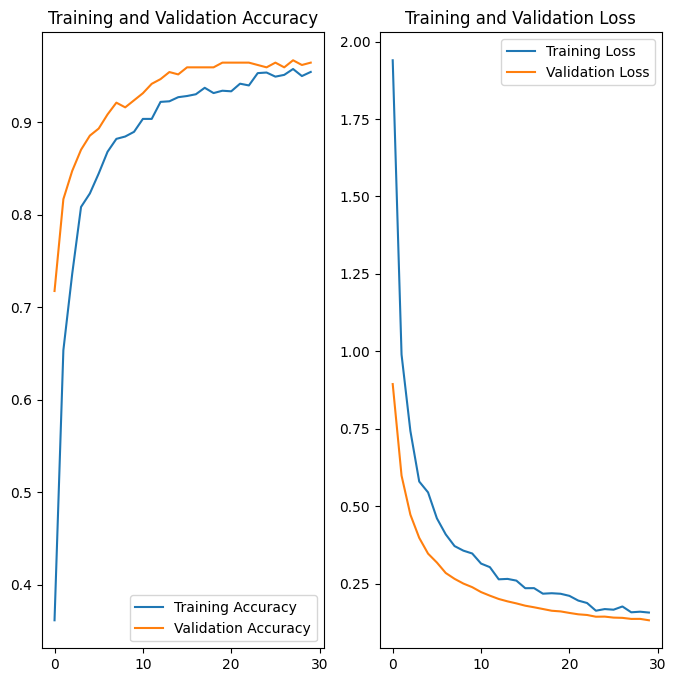

In [249]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 1s 965ms/step


<Figure size 800x800 with 0 Axes>

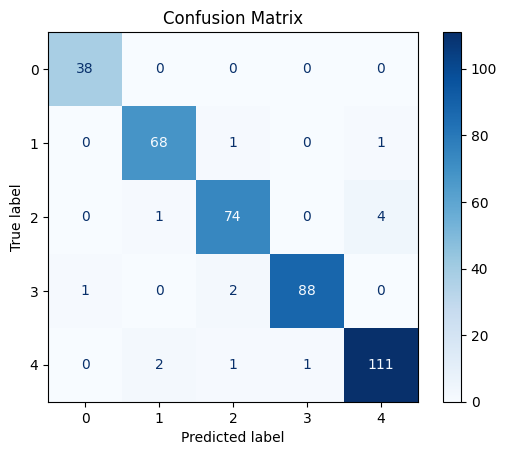

In [250]:
y_true = []
y_pred = []

for x_batch, y_batch in val_ds:
    y_true.extend(y_batch.numpy())
    y_pred.extend(np.argmax(model.predict(x_batch), axis=1))
y_true = np.array(y_true)
y_pred = np.array(y_pred)

cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
classes = [str(i) for i in range(5)]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
plt.figure(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [251]:
# Print classification report
report = classification_report(y_true, y_pred, target_names=classes)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       0.96      0.97      0.96        70
           2       0.95      0.94      0.94        79
           3       0.99      0.97      0.98        91
           4       0.96      0.97      0.96       115

    accuracy                           0.96       393
   macro avg       0.97      0.97      0.97       393
weighted avg       0.96      0.96      0.96       393



### Predicting on new data

In [252]:
img = tf.keras.utils.load_img(
   "/content/test.jpg", target_size=(128, 128)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 34ms/step
This image most likely belongs to rust with a 25.32 percent confidence.


## InceptionV3

### Creating the model

In [253]:
# Load the InceptionV3 model pre-trained on ImageNet
base_model = tf.keras.applications.InceptionV3(input_shape=(128, 128, 3),
                                               include_top=False,
                                               weights='imagenet')

In [254]:
# Freeze the base model layers
base_model.trainable = False

# Create the model by adding custom layers on top of InceptionV3
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

### Compiling the model

In [255]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
 0 (GlobalAveragePooling2D)                                      
                                                                 
 dense_34 (Dense)            (None, 128)               262272    
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_35 (Dense)            (None, 5)                 645       
                                                                 
Total params: 22065701 (84.17 MB)
Trainable params: 262917 (1.00 MB)
Non-trainable params: 21802784 (83.17 MB)
________

### Forming the model

In [256]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
50/50 [==============================] - 7s 63ms/step - loss: 16.9660 - accuracy: 0.3623 - val_loss: 1.1131 - val_accuracy: 0.5420
Epoch 2/30
50/50 [==============================] - 2s 35ms/step - loss: 1.3176 - accuracy: 0.4093 - val_loss: 1.0280 - val_accuracy: 0.5929
Epoch 3/30
50/50 [==============================] - 2s 33ms/step - loss: 1.2331 - accuracy: 0.4626 - val_loss: 0.9446 - val_accuracy: 0.6336
Epoch 4/30
50/50 [==============================] - 2s 33ms/step - loss: 1.1444 - accuracy: 0.4822 - val_loss: 0.8806 - val_accuracy: 0.6387
Epoch 5/30
50/50 [==============================] - 2s 33ms/step - loss: 1.1511 - accuracy: 0.4581 - val_loss: 0.8917 - val_accuracy: 0.5751
Epoch 6/30
50/50 [==============================] - 2s 33ms/step - loss: 1.1177 - accuracy: 0.4854 - val_loss: 0.8701 - val_accuracy: 0.5776
Epoch 7/30
50/50 [==============================] - 2s 37ms/step - loss: 1.1166 - accuracy: 0.4924 - val_loss: 0.8174 - val_accuracy: 0.6489
Epoch 8/30
5

### Visualizing Results

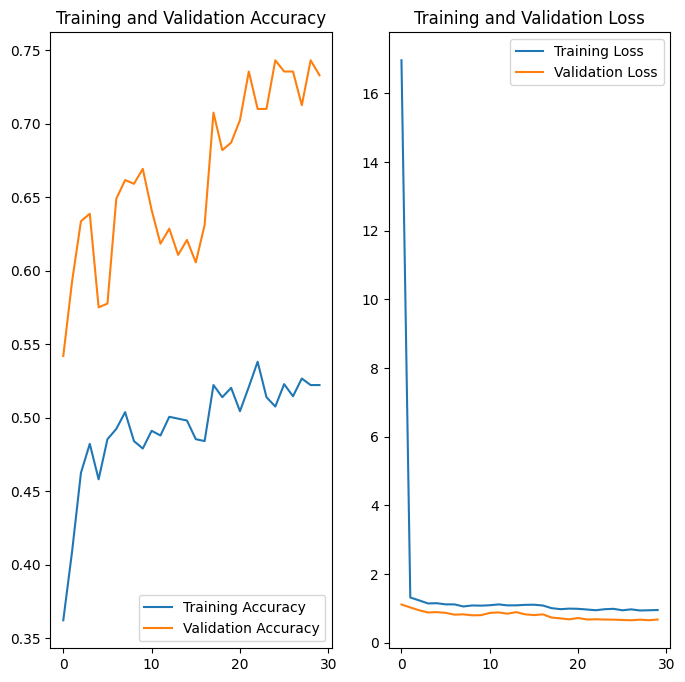

In [257]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 1s 1s/step


<Figure size 800x800 with 0 Axes>

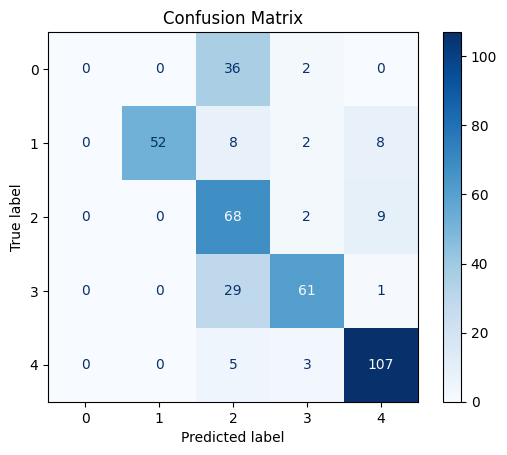

In [258]:
y_true = []
y_pred = []

for x_batch, y_batch in val_ds:
    y_true.extend(y_batch.numpy())
    y_pred.extend(np.argmax(model.predict(x_batch), axis=1))
y_true = np.array(y_true)
y_pred = np.array(y_pred)

cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
classes = [str(i) for i in range(5)]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
plt.figure(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [259]:
# Print classification report
report = classification_report(y_true, y_pred, target_names=classes)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       1.00      0.74      0.85        70
           2       0.47      0.86      0.60        79
           3       0.87      0.67      0.76        91
           4       0.86      0.93      0.89       115

    accuracy                           0.73       393
   macro avg       0.64      0.64      0.62       393
weighted avg       0.72      0.73      0.71       393



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Predicting on new data

In [260]:
img = tf.keras.utils.load_img(
   "/content/test.jpg", target_size=(128, 128)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 26ms/step
This image most likely belongs to miner with a 20.07 percent confidence.


## VGG-19

### Creating the model

In [261]:
# Load the VGG-19 model pre-trained on ImageNet
base_model = tf.keras.applications.VGG19(input_shape=(128, 128, 3),
                                         include_top=False,
                                         weights='imagenet')

In [262]:
# Freeze the base model layers
base_model.trainable = False

# Create the model by adding custom layers on top of VGG-19
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])


### Compiling the model

In [263]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_8 (Flatten)         (None, 8192)              0         
                                                                 
 dense_36 (Dense)            (None, 4096)              33558528  
                                                                 
 dropout_15 (Dropout)        (None, 4096)              0         
                                                                 
 dense_37 (Dense)            (None, 4096)              16781312  
                                                                 
 dropout_16 (Dropout)        (None, 4096)              0         
                                                                 
 dense_38 (Dense)            (None, 5)               

### Forming the model

In [264]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
50/50 [==============================] - 5s 78ms/step - loss: 4.4707 - accuracy: 0.7234 - val_loss: 1.3943 - val_accuracy: 0.9160
Epoch 2/30
50/50 [==============================] - 4s 71ms/step - loss: 1.3270 - accuracy: 0.9188 - val_loss: 0.4596 - val_accuracy: 0.9491
Epoch 3/30
50/50 [==============================] - 4s 71ms/step - loss: 0.8521 - accuracy: 0.9346 - val_loss: 0.3107 - val_accuracy: 0.9746
Epoch 4/30
50/50 [==============================] - 4s 85ms/step - loss: 0.6736 - accuracy: 0.9486 - val_loss: 0.9516 - val_accuracy: 0.9440
Epoch 5/30
50/50 [==============================] - 4s 72ms/step - loss: 0.4223 - accuracy: 0.9632 - val_loss: 0.7623 - val_accuracy: 0.9567
Epoch 6/30
50/50 [==============================] - 4s 85ms/step - loss: 0.3779 - accuracy: 0.9645 - val_loss: 0.4188 - val_accuracy: 0.9695
Epoch 7/30
50/50 [==============================] - 4s 74ms/step - loss: 0.3959 - accuracy: 0.9683 - val_loss: 1.0302 - val_accuracy: 0.9466
Epoch 8/30
50

### Visualizing Results

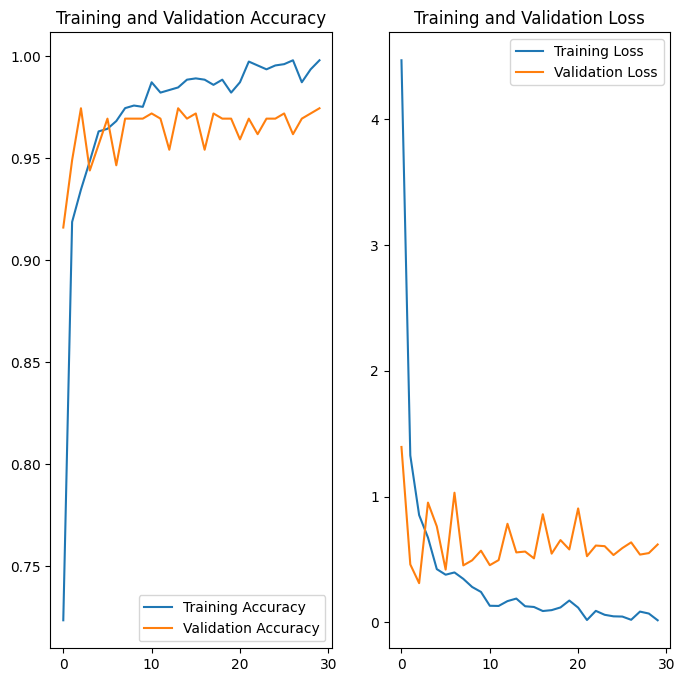

In [265]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 306ms/step


<Figure size 800x800 with 0 Axes>

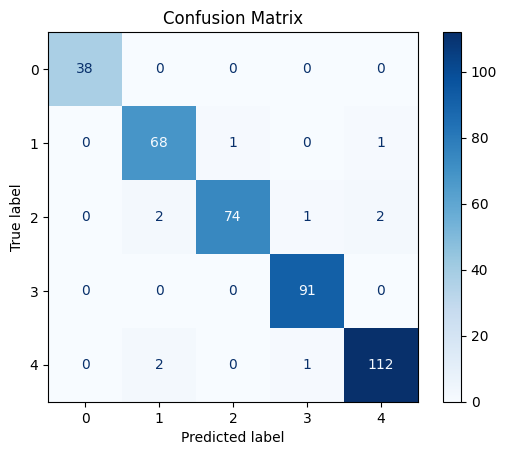

In [266]:
y_true = []
y_pred = []

for x_batch, y_batch in val_ds:
    y_true.extend(y_batch.numpy())
    y_pred.extend(np.argmax(model.predict(x_batch), axis=1))
y_true = np.array(y_true)
y_pred = np.array(y_pred)

cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
classes = [str(i) for i in range(5)]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
plt.figure(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [267]:
# Print classification report
report = classification_report(y_true, y_pred, target_names=classes)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.94      0.97      0.96        70
           2       0.99      0.94      0.96        79
           3       0.98      1.00      0.99        91
           4       0.97      0.97      0.97       115

    accuracy                           0.97       393
   macro avg       0.98      0.98      0.98       393
weighted avg       0.97      0.97      0.97       393



### Predicting on new data

In [268]:
img = tf.keras.utils.load_img(
   "/content/test.jpg", target_size=(128, 128)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 22ms/step
This image most likely belongs to rust with a 40.46 percent confidence.


## DenseNet-201

### Creating the model

In [269]:
#Load the DenseNet-201 model pre-trained on ImageNet
base_model = tf.keras.applications.DenseNet201(input_shape=(128, 128, 3),
                                               include_top=False,
                                               weights='imagenet')

In [270]:
# Freeze the base model layers
base_model.trainable = False

# Create the model by adding custom layers on top of DenseNet-201
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])


### Compiling the model

In [271]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 4, 4, 1920)        18321984  
                                                                 
 global_average_pooling2d_1  (None, 1920)              0         
 1 (GlobalAveragePooling2D)                                      
                                                                 
 dense_39 (Dense)            (None, 128)               245888    
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_40 (Dense)            (None, 5)                 645       
                                                                 
Total params: 18568517 (70.83 MB)
Trainable params: 246533 (963.02 KB)
Non-trainable params: 18321984 (69.89 MB)
______

### Forming the model

In [272]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
50/50 [==============================] - 19s 160ms/step - loss: 3.2012 - accuracy: 0.5228 - val_loss: 0.6899 - val_accuracy: 0.7786
Epoch 2/30
50/50 [==============================] - 4s 73ms/step - loss: 0.7288 - accuracy: 0.7595 - val_loss: 0.3611 - val_accuracy: 0.8779
Epoch 3/30
50/50 [==============================] - 4s 74ms/step - loss: 0.5250 - accuracy: 0.8071 - val_loss: 0.2834 - val_accuracy: 0.9059
Epoch 4/30
50/50 [==============================] - 4s 77ms/step - loss: 0.4291 - accuracy: 0.8439 - val_loss: 0.2671 - val_accuracy: 0.9008
Epoch 5/30
50/50 [==============================] - 4s 73ms/step - loss: 0.3761 - accuracy: 0.8598 - val_loss: 0.2301 - val_accuracy: 0.9364
Epoch 6/30
50/50 [==============================] - 4s 73ms/step - loss: 0.3446 - accuracy: 0.8674 - val_loss: 0.2322 - val_accuracy: 0.9160
Epoch 7/30
50/50 [==============================] - 4s 80ms/step - loss: 0.3200 - accuracy: 0.8782 - val_loss: 0.2012 - val_accuracy: 0.9466
Epoch 8/30


### Visualizing Results

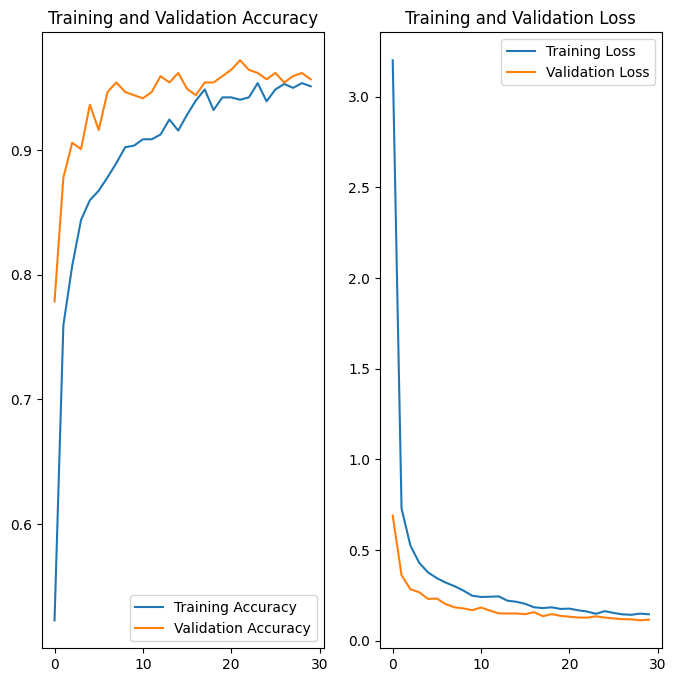

In [273]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 3s 3s/step


<Figure size 800x800 with 0 Axes>

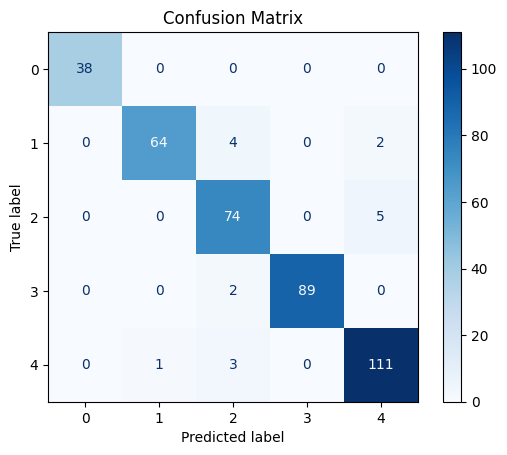

In [274]:
y_true = []
y_pred = []

for x_batch, y_batch in val_ds:
    y_true.extend(y_batch.numpy())
    y_pred.extend(np.argmax(model.predict(x_batch), axis=1))
y_true = np.array(y_true)
y_pred = np.array(y_pred)

cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
classes = [str(i) for i in range(5)]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
plt.figure(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [275]:
# Print classification report
report = classification_report(y_true, y_pred, target_names=classes)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.98      0.91      0.95        70
           2       0.89      0.94      0.91        79
           3       1.00      0.98      0.99        91
           4       0.94      0.97      0.95       115

    accuracy                           0.96       393
   macro avg       0.96      0.96      0.96       393
weighted avg       0.96      0.96      0.96       393



### Predicting on new data

In [276]:
img = tf.keras.utils.load_img(
   "/content/test.jpg", target_size=(128, 128)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 39ms/step
This image most likely belongs to phoma with a 28.52 percent confidence.


# Machine Learning Models

In [277]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

### Extracting features

In [278]:
# Extract features using a simple model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),
    tf.keras.layers.Flatten(),
])
model.compile()

In [279]:
# Extract features from the training set
train_features = []
train_labels = []
for x_batch, y_batch in train_ds:
    features = model.predict(x_batch)
    train_features.append(features)
    train_labels.append(y_batch.numpy())

train_features = np.concatenate(train_features, axis=0)
train_labels = np.concatenate(train_labels, axis=0)

1/1 [==============================] - 0s 19ms/step


In [280]:
# Extract features from the validation set
val_features = []
val_labels = []
for x_batch, y_batch in val_ds:
    features = model.predict(x_batch)
    val_features.append(features)
    val_labels.append(y_batch.numpy())

val_features = np.concatenate(val_features, axis=0)
val_labels = np.concatenate(val_labels, axis=0)

1/1 [==============================] - 0s 26ms/step


## SVM

### Training Phase

In [281]:
# Train an SVM classifier
svm_classifier = svm.SVC(kernel='linear', C=1.0)
svm_classifier.fit(train_features, train_labels)

SVC(kernel='linear')

### Prediction Phase

In [282]:
# Make predictions on the validation set
val_predictions = svm_classifier.predict(val_features)
val_predictions

array([3, 0, 2, 1, 3, 4, 1, 1, 1, 4, 2, 0, 1, 4, 1, 4, 0, 4, 1, 3, 4, 3,
       4, 4, 2, 1, 3, 3, 2, 4, 1, 4, 1, 2, 1, 0, 3, 4, 3, 2, 4, 3, 0, 1,
       4, 4, 1, 2, 4, 1, 2, 0, 1, 2, 3, 0, 2, 4, 2, 3, 1, 0, 1, 2, 3, 2,
       3, 4, 4, 3, 3, 2, 0, 3, 1, 4, 2, 3, 1, 3, 4, 2, 2, 2, 2, 3, 4, 3,
       1, 3, 4, 4, 1, 4, 4, 3, 4, 1, 4, 3, 1, 3, 3, 2, 1, 0, 4, 4, 3, 3,
       3, 2, 2, 3, 2, 3, 2, 1, 2, 4, 1, 4, 0, 4, 3, 2, 3, 3, 0, 3, 4, 0,
       1, 2, 4, 4, 1, 3, 2, 2, 1, 1, 4, 0, 2, 4, 2, 4, 0, 4, 3, 1, 4, 4,
       2, 2, 3, 2, 4, 0, 2, 0, 4, 4, 4, 4, 3, 2, 0, 3, 3, 3, 4, 2, 1, 4,
       1, 3, 1, 3, 4, 3, 4, 2, 3, 2, 0, 4, 1, 1, 4, 2, 3, 2, 0, 0, 3, 1,
       3, 3, 3, 0, 4, 4, 4, 1, 4, 1, 4, 4, 0, 1, 3, 4, 1, 1, 4, 1, 4, 3,
       4, 4, 1, 4, 4, 4, 1, 0, 4, 0, 1, 1, 1, 4, 3, 0, 1, 2, 2, 3, 4, 2,
       4, 1, 4, 2, 4, 4, 2, 2, 2, 4, 1, 0, 3, 0, 2, 3, 1, 1, 4, 1, 3, 1,
       4, 4, 3, 3, 4, 3, 0, 2, 4, 2, 2, 2, 2, 1, 1, 2, 3, 4, 0, 3, 2, 4,
       2, 2, 3, 4, 2, 4, 1, 1, 0, 0, 4, 2, 3, 3, 3,

### Visualizing Results

In [283]:
# Calculate accuracy
accuracy = accuracy_score(val_labels, val_predictions)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Validation Accuracy: 93.13%


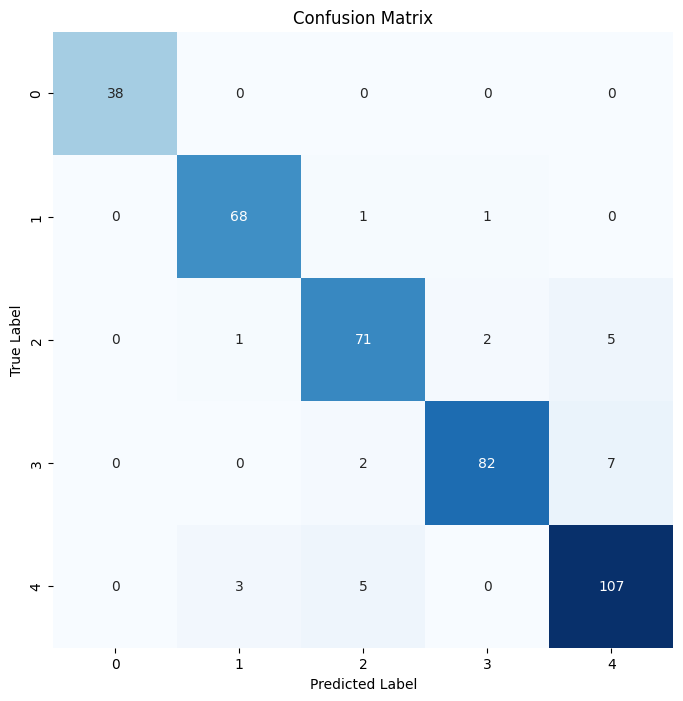

In [284]:
# Calculate confusion matrix
cm = confusion_matrix(val_labels, val_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(5), yticklabels=range(5))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [285]:
# Print classification report
report = classification_report(y_true, y_pred, target_names=classes)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.98      0.91      0.95        70
           2       0.89      0.94      0.91        79
           3       1.00      0.98      0.99        91
           4       0.94      0.97      0.95       115

    accuracy                           0.96       393
   macro avg       0.96      0.96      0.96       393
weighted avg       0.96      0.96      0.96       393



## KNN

### Training Phase

In [286]:
# Train KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(train_features, train_labels)

KNeighborsClassifier(n_neighbors=3)

### Prediction Phase

In [287]:
# Make predictions on the validation set
val_predictions = knn_classifier.predict(val_features)
val_predictions

array([3, 0, 2, 4, 4, 4, 1, 1, 1, 4, 2, 0, 1, 4, 1, 4, 0, 4, 1, 3, 4, 3,
       4, 4, 2, 1, 4, 3, 2, 4, 1, 4, 1, 2, 1, 0, 3, 4, 3, 2, 4, 3, 0, 1,
       4, 4, 1, 2, 4, 1, 2, 0, 1, 2, 3, 0, 2, 4, 2, 3, 1, 0, 1, 2, 3, 1,
       3, 4, 4, 3, 3, 2, 0, 3, 1, 4, 2, 3, 1, 2, 4, 2, 2, 1, 2, 3, 4, 3,
       1, 3, 4, 4, 4, 4, 4, 4, 4, 1, 2, 3, 1, 4, 2, 2, 1, 0, 4, 4, 3, 3,
       3, 2, 2, 3, 4, 3, 1, 1, 2, 4, 1, 4, 0, 4, 3, 2, 3, 3, 0, 3, 4, 0,
       1, 2, 4, 4, 1, 4, 2, 3, 1, 1, 4, 0, 2, 4, 2, 4, 0, 4, 3, 1, 4, 4,
       2, 3, 3, 1, 3, 0, 4, 0, 4, 4, 4, 4, 3, 2, 0, 3, 3, 3, 4, 2, 1, 4,
       4, 3, 1, 4, 1, 2, 4, 2, 3, 2, 0, 4, 4, 1, 4, 4, 3, 2, 0, 0, 3, 1,
       3, 3, 3, 0, 4, 4, 1, 1, 4, 1, 2, 4, 0, 1, 3, 2, 1, 4, 4, 1, 4, 4,
       4, 4, 1, 3, 4, 4, 1, 0, 4, 0, 1, 2, 4, 4, 3, 0, 1, 2, 2, 2, 4, 2,
       4, 1, 4, 2, 4, 4, 2, 2, 2, 0, 4, 0, 3, 0, 2, 3, 1, 1, 4, 1, 3, 1,
       4, 4, 3, 3, 4, 3, 0, 2, 4, 2, 2, 4, 2, 1, 1, 2, 3, 4, 0, 3, 2, 4,
       2, 2, 3, 4, 2, 4, 1, 1, 0, 0, 4, 4, 3, 3, 3,

### Visualizing Results

In [288]:
# Calculate accuracy
accuracy = accuracy_score(val_labels, val_predictions)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Validation Accuracy: 90.08%


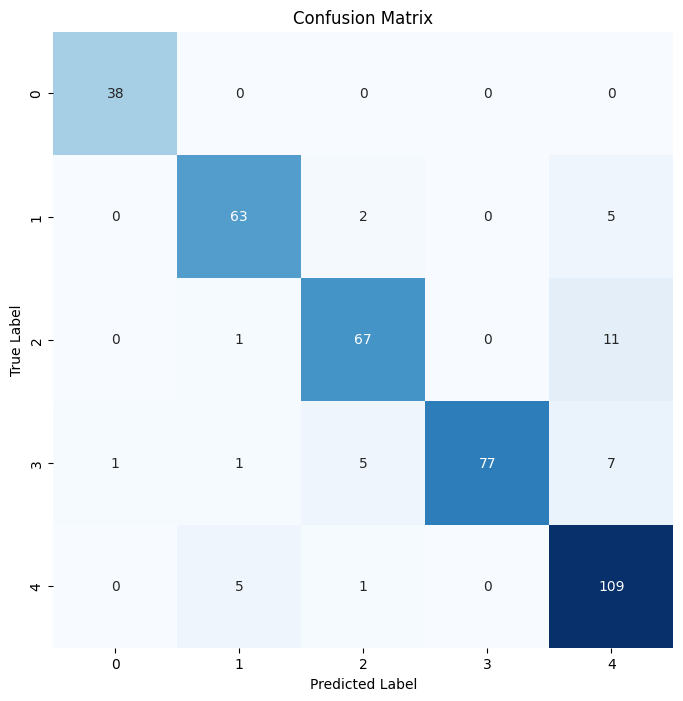

In [289]:
# Calculate confusion matrix
cm = confusion_matrix(val_labels, val_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(5), yticklabels=range(5))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [290]:
# Print classification report
report = classification_report(y_true, y_pred, target_names=classes)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.98      0.91      0.95        70
           2       0.89      0.94      0.91        79
           3       1.00      0.98      0.99        91
           4       0.94      0.97      0.95       115

    accuracy                           0.96       393
   macro avg       0.96      0.96      0.96       393
weighted avg       0.96      0.96      0.96       393



## MLP Classifier

### Training Phase

In [291]:
# Train MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
mlp_classifier.fit(train_features, train_labels)

MLPClassifier(max_iter=500)

### Prediction Phase

In [292]:
# Make predictions on the validation set
val_predictions = mlp_classifier.predict(val_features)

### Visualizing Results

In [293]:
# Calculate accuracy
accuracy = accuracy_score(val_labels, val_predictions)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Validation Accuracy: 83.21%


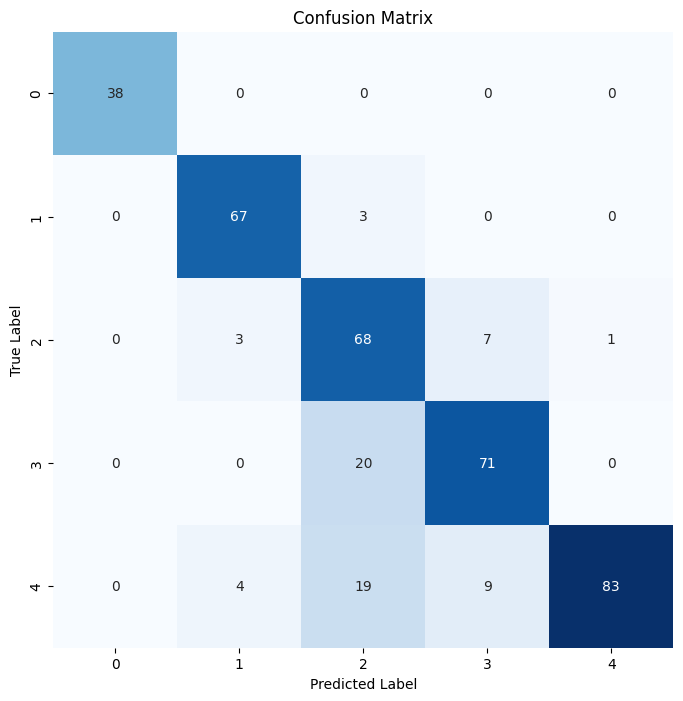

In [294]:
# Calculate confusion matrix
cm = confusion_matrix(val_labels, val_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(5), yticklabels=range(5))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [295]:
# Print classification report
report = classification_report(y_true, y_pred, target_names=classes)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.98      0.91      0.95        70
           2       0.89      0.94      0.91        79
           3       1.00      0.98      0.99        91
           4       0.94      0.97      0.95       115

    accuracy                           0.96       393
   macro avg       0.96      0.96      0.96       393
weighted avg       0.96      0.96      0.96       393



# **Results**

<!-- Deep Learning Models -->
<font size="10">

| Model                 | Precision | Recall | F1-Score | Accuracy |
|-----------------------|-----------|--------|----------|----------|
| **Custom CNN**        | 0.96      | 0.96   | 0.96     | 0.96     |
| **MobileNet**         | 0.88      | 0.88   | 0.88     | 0.88     |
| **ResNet50**          | 0.96      | 0.96   | 0.96     | 0.96     |
| **InceptionV3**       | 0.73      | 0.73   | 0.71     | 0.73     |
| **VGG19**             | 0.97      | 0.97   | 0.97     | 0.97     |
| **DenseNet-201**      | 0.96      | 0.96   | 0.96     | 0.96     |

</font>

<!-- Machine Learning Models -->
<font size="100">

| Model                 | Precision | Recall | F1-Score | Accuracy |
|-----------------------|-----------|--------|----------|----------|
| **SVM**               | 0.96      | 0.96   | 0.96     | 0.96     |
| **KNN**               | 0.96      | 0.96   | 0.96     | 0.96     |
| **MLP Classifier**    | 0.96      | 0.96   | 0.96     | 0.96     |

</font>


# Analyse Profonde des Résultats de Classification

## Modèles d'Apprentissage Profond

Les résultats de la classification obtenus par nos modèles d'apprentissage profond démontrent des performances variables.

### Custom CNN
Le modèle Custom CNN présente des scores de précision, de rappel, de F1-score et d'exactitude de 96%, indiquant une classification robuste de nos classes cibles.

### MobileNet
Bien que MobileNet ait obtenu des résultats acceptables avec une précision globale de 88%, sa performance pourrait bénéficier d'une amélioration pour certaines classes spécifiques.

### ResNet50
ResNet50 affiche des performances élevées avec un F1-score global de 96%, soulignant son efficacité dans la classification précise des classes.

### InceptionV3
InceptionV3 montre des résultats inférieurs par rapport aux autres modèles, avec un F1-score de 71%. Des ajustements ou une exploration plus approfondie des paramètres peuvent être nécessaires.

### VGG19
VGG19 se distingue avec un F1-score de 97%, démontrant une excellente précision et rappel pour toutes les classes.

### DenseNet-201
DenseNet-201 maintient une performance élevée avec un F1-score de 96%, validant son efficacité dans la tâche de classification.

## Modèles d'Apprentissage Machine

Les modèles d'apprentissage machine, bien que traditionnels, affichent également des résultats remarquables.

### SVM
Le modèle SVM présente des scores de précision, de rappel, de F1-score et d'exactitude de 96%, démontrant une compétitivité comparable aux modèles d'apprentissage profond.

### KNN
KNN affiche des performances similaires à SVM, avec un F1-score de 96%, validant son utilité dans la classification des données complexes.

### MLP Classifier
Le MLP Classifier présente des résultats cohérents avec les autres modèles, soulignant sa fiabilité dans la tâche de classification.

## Conclusion

Dans l'ensemble, nos modèles d'apprentissage profond montrent des performances solides, avec certains modèles surperformant les autres, avec VGG19 émergeant comme le modèle le plus robuste. VGG19 affiche des scores de précision, de rappel, de F1-score et d'exactitude de 97%, démontrant une excellence constante dans la classification de toutes les classes. . Cependant, les modèles d'apprentissage machine classique, tels que SVM et KNN, démontrent également une compétitivité significative.
